# Whiteness vs Type of Schools in Counties

In [2]:
# import dataset without foreign schools and missing data
df = pd.read_csv(r'../data/modeling/combined.csv', encoding = "ISO-8859-1")
df.columns

<IPython.core.display.Javascript object>

Index(['opeid', 'agemedian', 'cdr2014_log', 'cdr2015_log', 'cdr2016_log',
       'cohort2014_log', 'cohort2015_log', 'cohort2016_log', 'density_log',
       'educationcollegeorabove', 'familysize_log', 'female_sqrt',
       'homeownership', 'homevalue_log', 'incomehouseholdmedian_log',
       'incomehouseholdsixfigure_log', 'laborforceparticipation_sqrt',
       'male_reciprocal', 'married', 'population_log', 'proglength',
       'raceasian_log', 'raceblack_log', 'racemultiple_log',
       'racenative_reciprocal', 'raceother_log', 'racepacific', 'racewhite',
       'rentmedian_log', 'unemploymentrate_log', 'associates', 'bachelors',
       'firstprofessional', 'gradprofessional', 'mastersordoctors',
       'nondegree', 'nondegree1year', 'nondegree2years', 'nondegree3years',
       'private', 'proprietary', 'public', 'hbcuCollege', 'hispanicCollege',
       'nativeAmericanCollege', 'notReportedCollege'],
      dtype='object')

In [141]:
print('median: ', df.racewhite.median())

median:  0.7307692309999999
mean:  0.6991731465795044


In [143]:
threshold = df.racewhite.median()

df['highWhite'] = [1 if x >= threshold else 0 for x in df.racewhite]
df.highWhite.value_counts()

1    1797
0    1794
Name: highWhite, dtype: int64

In [144]:
# adding schoolType back
label = []
for row in df.itertuples():
    if row.private == 1:
        label.append('private')
    elif row.proprietary == 1:
        label.append('proprietary')
    else:
        label.append('public')
df['schoolType'] = label

In [145]:
grouped = df.groupby(['highWhite', 'schoolType'])

In [146]:
grouped.describe()

opeid                                                \
                       count          mean           std     min       25%   
highWhite schoolType                                                         
0         private      652.0   9452.932515  12084.711218  1003.0   2146.75   
          proprietary  598.0  28983.145485  11939.111984  1177.0  21874.50   
          public       544.0   6665.724265   8472.462587  1004.0   1727.50   
1         private      540.0   7549.361111  10307.403649  1088.0   2091.25   
          proprietary  552.0  28120.601449  11784.631258  1895.0  21628.50   
          public       705.0   7979.782979   9182.922355  1008.0   2488.00   

                                                  agemedian            ...  \
                           50%       75%      max     count      mean  ...   
highWhite schoolType                                                   ...   
0         private       3271.0  10587.00  42355.0     652.0  0.287862  ...   
          proprietary  31085.5  41200.25  42297.0     598.0  0.299664  ...   
          public        3448.5   7880.50  42636.0     544.0  0.282830  ...   
1         private       3226.5   6411.75  41938.0     540.0  0.320540  ...   
          proprietary  26181.0  41242.00  42319.0     552.0  0.345259  ...   
          public        3784.0   9272.00  42544.0     705.0  0.313818  ...   

                      nativeAmericanCollege      notReportedCollege            \
                                        75%  max              count      mean   
highWhite schoolType                                                            
0         private                       0.0  0.0              652.0  0.926380   
          proprietary                   0.0  0.0              598.0  0.996656   
          public                        0.0  0.0              544.0  0.869485   
1         private                       0.0  0.0              540.0  0.981481   
          proprietary                   0.0  0.0              552.0  1.000000   
          public                        0.0  1.0              705.0  0.933333   

                                                          
                            std  min  25%  50%  75%  max  
highWhite schoolType                                      
0         private      0.261351  0.0  1.0  1.0  1.0  1.0  
          proprietary  0.057783  0.0  1.0  1.0  1.0  1.0  
          public       0.337179  0.0  1.0  1.0  1.0  1.0  
1         private      0.134942  0.0  1.0  1.0  1.0  1.0  
          proprietary  0.000000  1.0  1.0  1.0  1.0  1.0  
          public       0.249621  0.0  1.0  1.0  1.0  1.0  

[6 rows x 368 columns]

In [147]:
import numpy as np

highWhite0 = {
    'private' : grouped.get_group((0, 'private')).count().iloc[0],
    'public' : grouped.get_group((0, 'public')).count().iloc[0],
    'proprietary' : grouped.get_group((0, 'proprietary')).count().iloc[0],
    'total': np.array(list(highWhite0.values())).sum()
}

highWhite1 = {
    'private' : grouped.get_group((1, 'private')).count().iloc[0],
    'public' : grouped.get_group((1, 'public')).count().iloc[0],
    'proprietary' : grouped.get_group((1, 'proprietary')).count().iloc[0],
    'total': np.array(list(highWhite1.values())).sum()
}

In [148]:
highWhite = ('0', '1')
proprietary = (highWhite0.get('proprietary'), highWhite1.get('proprietary'))

In [149]:
white = pd.DataFrame(list(zip(highWhite, proprietary)), columns = ['highWhite', 'proprietary'])
white

<IPython.core.display.Javascript object>

,highWhite,proprietary
0,0,598
1,1,552


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

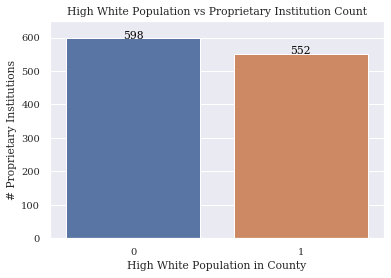

In [167]:
import seaborn as sns

sns.set(style = 'darkgrid', font = 'serif', font_scale = .9)

g = sns.barplot(x='highWhite', y = 'proprietary', data = white)
plt.xlabel('High White Population in County')
plt.ylabel('# Proprietary Institutions')
plt.title('High White Population vs Proprietary Institution Count')
plt.ylim(0,650)

#label values
for index, row in white.iterrows():
    g.text(row.name,row.proprietary, round(row.proprietary,2), color='black', ha="center")

In [182]:
smallerValue = highWhite1.get('proprietary')
largerValue = highWhite0.get('proprietary')
percentIncrease = (largerValue - smallerValue)/smallerValue * 100

print('Difference in # Proprietary Schools in Less White Counties: ', percentIncrease.round(2), '%')

Difference in # Proprietary Schools in Less White Counties:  8.33 %
